## Classification model과 confusion matrix histogram 간의 관계

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier #
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split #train 데이터를 validation과 model로 쪼개는 작업을 할 때 쓰는 메소드 

In [54]:
train = pd.read_csv('train.csv')

In [55]:
train.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
593,594,0,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.75,NaN,Q


In [56]:
train.isnull().sum()
# age가 Null 이 너무 많아서 사용 x

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Preprocessing

In [57]:
train['Sex'] = train['Sex'].replace('female', 1).replace('male', 0)
train['Family'] = train['SibSp'] + train['Parch'] + 1

In [58]:
train.loc[train['Embarked'].isnull(), 'Embarked'] = 'S' #null 2개 값은 젤 많은 s로 넣어줌 

In [59]:
train = pd.concat([train, pd.get_dummies(train['Embarked'])], axis=1) #one-hot encoding 

In [60]:
train.head() #sex 값 바뀌고, family 생기고, 원핫인코딩 생김(embarked)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,0,0,1


### Split train validation

In [61]:
features = ['Pclass', 'Sex', 'Family', 'C', 'Q', 'S'] #쓰고 싶은 피쳐들 

In [62]:
X = train[features] #피쳐 칼럼 
y = train['Survived']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
#test_size -> 20%, random은 42로 픽스

### Make classification model

In [64]:
tree = DecisionTreeClassifier(random_state=42)

In [65]:
tree.fit(X_train, y_train) #기본 옵션으로 돌림 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [66]:
prediction = tree.predict(X_test)

In [67]:
prediction_proba = tree.predict_proba(X_test)[:,1]

In [68]:
y_test = pd.DataFrame(y_test)
y_test.columns = ['Actual']

In [69]:
y_test['Predict'] = prediction
y_test['Predict_proba'] = prediction_proba

In [70]:
y_test.head()

,Actual,Predict,Predict_proba
709,1,0,0.333333
439,0,0,0.090909
840,0,0,0.129630
720,1,1,0.909091
39,1,0,0.250000


### Confusion Matrix

In [71]:
y_test.groupby(['Actual', 'Predict']).size()

Actual  Predict
0       0          97
        1           8
1       0          27
        1          47
dtype: int64

In [76]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test['Actual'], y_test['Predict'])
tn, fp, fn, tp = confusion.ravel()
print(tn, fp, fn, tp)
confusion
accuracy = (tp+tn) / (tp+tn+fp+fn)
print(accuracy)

97 8 27 47
0.8044692737430168


### 시각화

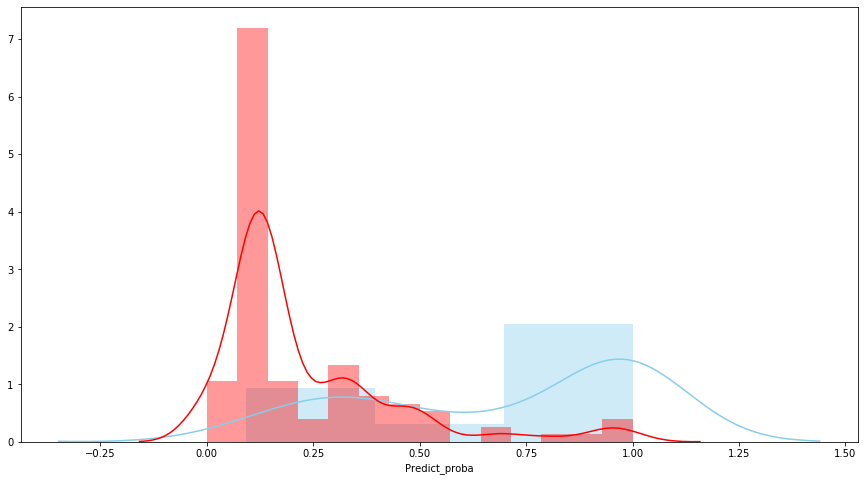

In [77]:
plt.figure(figsize=(15, 8))
sns.distplot(y_test[y_test['Actual']==1]['Predict_proba'], color="skyblue", label="Survived")
sns.distplot(y_test[y_test['Actual']==0]['Predict_proba'], color="Red", label="Dead")

### 미션
* 위의 모델보다 Accuracy가 좋은 모델을 만들고, displot 생김새를 비교해보세요.

In [105]:
import numpy as np
train['TravelAlone']=np.where((train["SibSp"]+train["Parch"])>0, 0, 1)
train["Age"].fillna(train["Age"].median(skipna=True), inplace=True)

In [106]:
# Answer
features = ['Pclass', 'Sex', 'Family','Fare','Age', 'C', 'Q', 'S','TravelAlone'] #쓰고 싶은 피쳐들 


In [107]:
X = train[features] #피쳐 칼럼 
y = train['Survived']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [109]:
forest = RandomForestClassifier(random_state=42, n_estimators=10)
forest = forest.fit(X_train, y_train)
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [111]:
prediction = forest.predict(X_test)

In [112]:
prediction_proba = forest.predict_proba(X_test)[:,1] # [:,1] 

In [113]:
y_test = pd.DataFrame(y_test)
y_test.columns = ['Actual']

In [114]:
y_test['Predict'] = prediction
y_test['Predict_proba'] = prediction_proba

In [115]:
y_test.head()

,Actual,Predict,Predict_proba
709,1,0,0.1
439,0,0,0.1
840,0,0,0.0
720,1,1,1.0
39,1,0,0.4


In [116]:
y_test.groupby(['Actual', 'Predict']).size()

Actual  Predict
0       0          88
        1          17
1       0          16
        1          58
dtype: int64

In [117]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test['Actual'], y_test['Predict'])
tn, fp, fn, tp = confusion.ravel()
print(tn, fp, fn, tp)
confusion
accuracy = (tp+tn) / (tp+tn+fp+fn)
print(accuracy)

88 17 16 58
0.8156424581005587


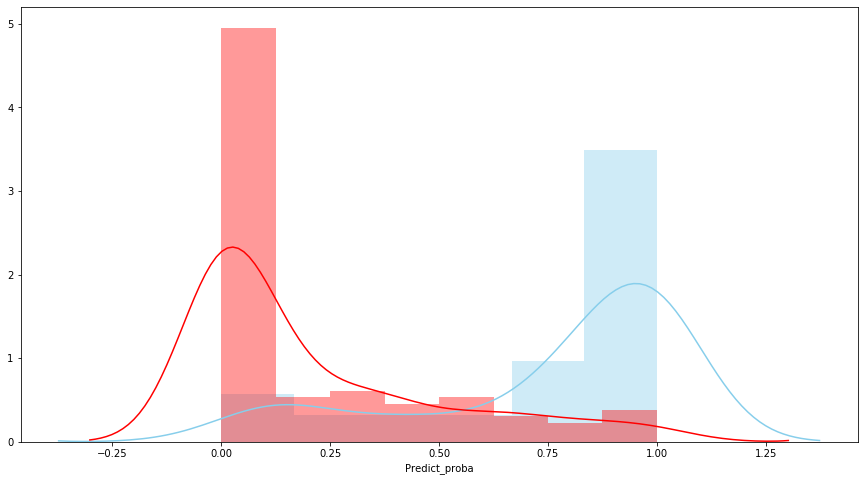

In [118]:
plt.figure(figsize=(15, 8))
sns.distplot(y_test[y_test['Actual']==1]['Predict_proba'], color="skyblue", label="Survived")
sns.distplot(y_test[y_test['Actual']==0]['Predict_proba'], color="Red", label="Dead")

* Threshold를 움직여가면서 ROC 커브상 좌표를 몇 개만 찾아보세요.

In [121]:
# Answer

from sklearn.metrics import roc_curve, auc


y_test['Predict_0.5']= y_test['Predict_proba'].apply(lambda x:1 if x >= 0.5 else 0)

In [122]:
y_test.groupby(['Actual','Predict_0.5']).size()

Actual  Predict_0.5
0       0              86
        1              19
1       0              15
        1              59
dtype: int64

In [123]:
# specificity = 86 / (86 + 19) =0.819
# fall-out rate = 1 - sp = 0.181
# recall =  59/(59+15) = 0.792
# roc 좌표 = (sp,re) = (0.81, 0.79)

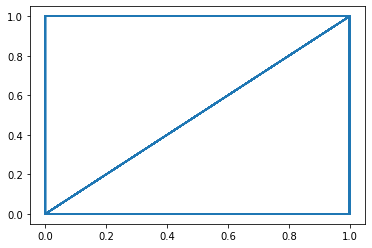

In [132]:
import matplotlib.pyplot as plt
import numpy as np

x = y_test['Predict_0.5']
y = y_test['Actual']

# This is the ROC curve
plt.plot(x,y)
plt.show() 

# This is the AUC
auc = np.trapz(y,x)

In [124]:
# threshold를 0으로 (다 살린다)
y_test['Predict_0.0']= y_test['Predict_proba'].apply(lambda x:1 if x >= 0.0 else 0)

In [127]:
y_test.groupby(['Actual','Predict_0.0']).size()

Actual  Predict_0.0
0       1              105
1       1               74
dtype: int64

In [128]:
# specificity = 0
# fall-out rate = 1
# recall =  1
# roc 좌표 = (1,1)

In [129]:
# threshold를 1으로 (다 죽인다)
y_test['Predict_1.0']= y_test['Predict_proba'].apply(lambda x:1 if x > 1.0 else 0)

In [130]:
y_test.groupby(['Actual','Predict_1.0']).size()

Actual  Predict_1.0
0       0              105
1       0               74
dtype: int64

In [ ]:
# specificity = 1
# fall-out rate = 0
# recall =  0
# roc 좌표 = (0,0)